In [1]:
import sys
from os.path import join, exists, abspath
from os import getcwd
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
import h5py
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
from nilearn import plotting
from nipype.interfaces import fsl

In [3]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/Users/sungbeenpark/github'

In [4]:
dname = join(dir_git,'nitools')
sys.path.append(dname)
import nitools as nt

In [5]:
dname = join(dir_git,'SUITPy')
sys.path.append(dname)
import SUITPy as suit

In [6]:
dname = join(dir_git)
sys.path.append(dname)
import surfAnalysisPy as surf

In [7]:
dname = join(dir_git,'SeqSpatialSupp_fMRI')
sys.path.append(dname)
from SSS import deal_spm
from SSS import util as su
from SSS import plot as splt
from SSS import image as simage

---

In [8]:
list_subj = []
for sess in ['S','R']:
    for nn in su.get_list_sn():
        subj = sess+nn
        list_subj.append(subj)
list_subj

['S01',
 'S02',
 'S03',
 'S05',
 'S06',
 'S08',
 'S09',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'R01',
 'R02',
 'R03',
 'R05',
 'R06',
 'R08',
 'R09',
 'R10',
 'R11',
 'R12',
 'R13',
 'R14']

## - FreeSurfer

In [9]:
dir_atlas = join(dir_git,'SeqSpatialSupp_fMRI/atlas/fs_LR_32k')

In [10]:
list_roi = simage.get_list_roi()

In [11]:
border = simage.get_border(join(dir_git,'surfAnalysisPy'))

9 [0 1 2 3 4 5 6 7 8]


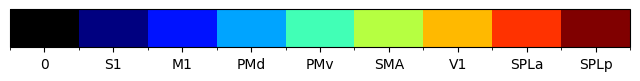

In [12]:
atlas = nb.load(join(dir_atlas,'ROI.32k.L.label.gii'))
tmp = np.unique(atlas.darrays[0].data)
print(len(tmp), tmp)

cmap= splt.cmap_for_cbar(list_roi, cm.jet)

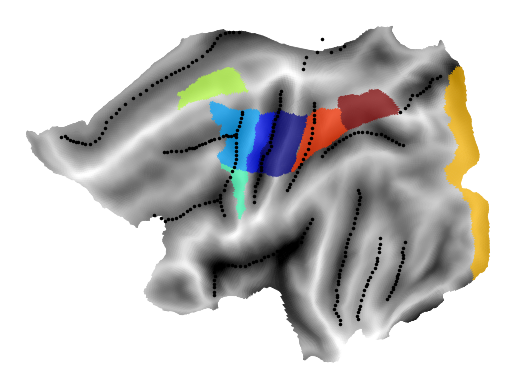

In [13]:
fig, ax = plt.subplots()

plt.sca(ax)
g = surf.plot.plotmap(
    data=atlas,
    surf='fs32k_L',
    alpha=0.7, cmap=cmap, colorbar=False,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
# rect = patches.Rectangle(
#     xy=(-40, -4), width=160, height=140,
#     linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
# )
# g.add_patch(rect)
# g.set_xlim(-40,120)
# g.set_ylim(65,66)

---

In [14]:
glm = 1
dir_glm = su.get_dir_glm(glm)

In [15]:
subj = 'S01'
# white, pial, _ = simage.get_WPM(subj=subj, glm=glm)

In [16]:
roi = 'M1'
hemi = 'L'

In [17]:
resMS = nb.load(join(
    su.get_dir_roi(),'glm_%d'%glm,'cifti.%s.%s.%s.ResMS.dscalar.nii'%(hemi,subj,roi)
)).get_fdata().reshape(-1)
resMS.shape

(565,)

(565, 565)


<Axes: >

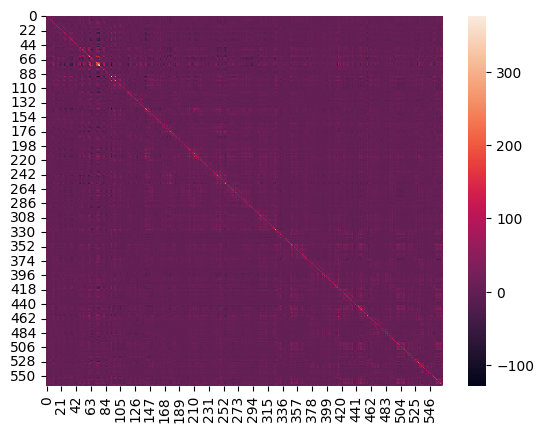

In [18]:
param = simage.get_optimal_hrf(subj=subj, roi=roi, r2_score=join(dir_glm,'r2_score.tsv'))
param = [5,15]

sig = simage.calc_sigma(subj=subj, glm=glm, roi=roi, param=param, hemi=hemi)
print(sig.shape)

sns.heatmap(sig)

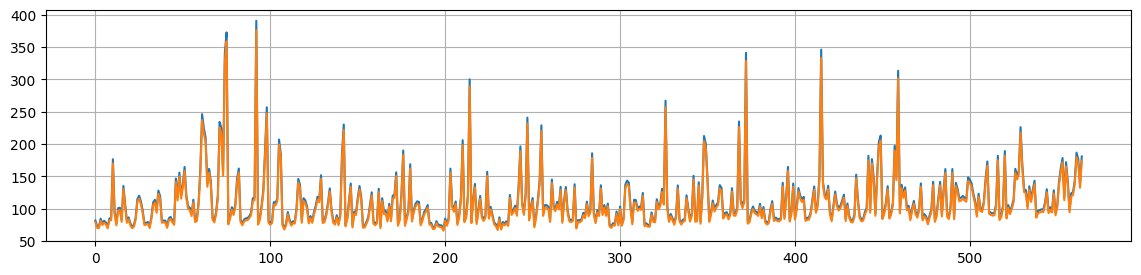

In [19]:
fig, ax = plt.subplots(figsize=(14,3))

x = np.arange(len(resMS))
ax.plot(x, resMS, label='resMS')
ax.plot(x, np.diagonal(sig), label=r'$\Sigma$')
ax.grid(axis='both')

---